In [201]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

348


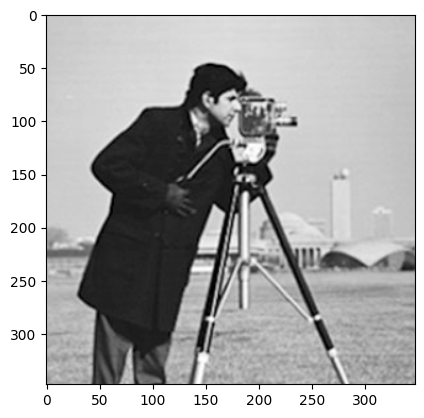

In [202]:
image = cv2.imread('test_img_5.png', 0)  # Load the image in grayscale
plt.imshow(image, cmap='gray')
print(image.shape[0])

In [203]:
f_transform = np.fft.fft2(image)         
# above line computes the 2-dimensional discrete Fourier transform of the input image. It converts the image from the spatial domain (pixel intensity values) to the frequency domain (amplitude and phase of various frequencies).

fshift = np.fft.fftshift(f_transform)
# After the Fourier transform, the frequency components are arranged such that the zero frequency component (DC component) is at the top-left corner of the transformed image. fftshift shifts this zero frequency component to the center of the image, making it easier to interpret. This function rearranges the quadrants of the Fourier-transformed image so that the low frequencies are in the center and the high frequencies are at the edges.

In [204]:
fshift.shape

(348, 347)

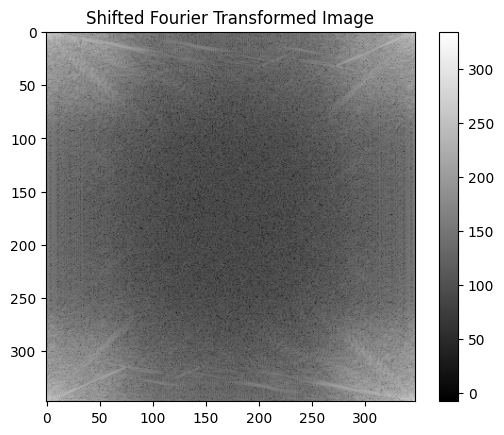

In [205]:
magnitude_spectrum = 20 * np.log(np.abs(f_transform))

# Display the shifted Fourier-transformed image
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Shifted Fourier Transformed Image')
plt.colorbar()
plt.show()

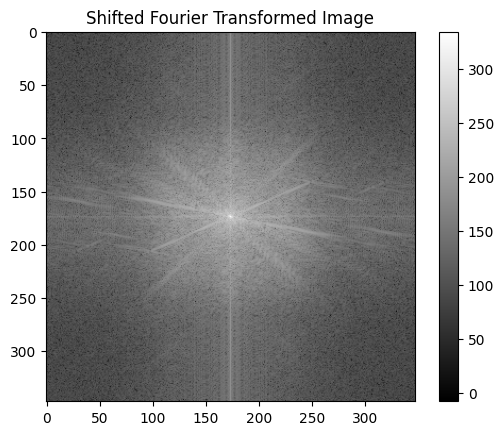

In [206]:
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Display the shifted Fourier-transformed image
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Shifted Fourier Transformed Image')
plt.colorbar()
plt.show()

Determine the appropriate size (kernel size) of the Gaussian filter and the standard deviation (sigma) that defines the spread of the Gaussian distribution. The larger the kernel size and sigma, the stronger the smoothing effect.

In [207]:
def gaussian_kernel(l, b, sigma_x, sigma_y):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma_x*sigma_y)) * np.exp(-((x-(l-1)/2)**2/(2*sigma_x**2) + (y-(b-1)/2)**2/(2*sigma_y**2))), (l, b))
    return kernel / np.sum(kernel)

kernel_size_l = fshift.shape[0]
kernel_size_b = fshift.shape[1]
sigma_x = 10
sigma_y = 80
gaussian_filter = gaussian_kernel(kernel_size_l,kernel_size_b, sigma_y,sigma_x )

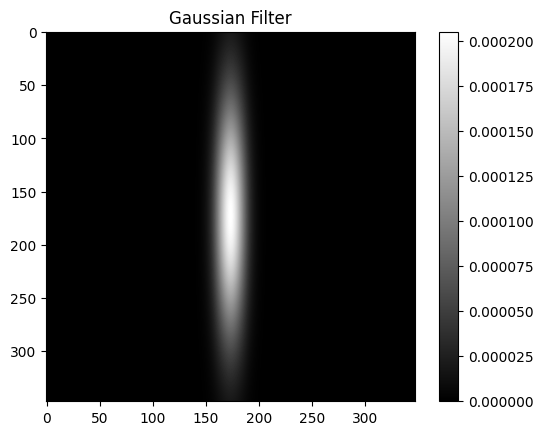

In [208]:
plt.imshow(gaussian_filter, cmap='gray')  # You can change the colormap as desired
plt.colorbar()  # Add a colorbar for reference
plt.title('Gaussian Filter')
plt.show()

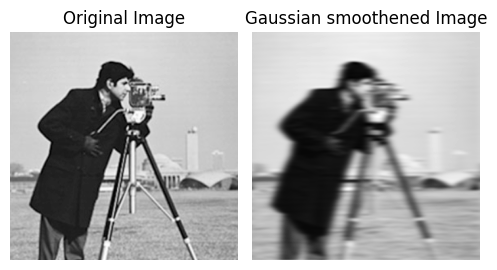

In [209]:
# Convolution in the frequency domain
convolved = fshift * gaussian_filter
convolved_image = np.fft.ifftshift(convolved)
image_restored = np.fft.ifft2(convolved_image).real  # Taking the real part to get the image

# Plotting the original image and the convolved image
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.abs(image), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_restored, cmap='gray')
plt.title('Gaussian smoothened Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [192]:
def butterworth_filter(shape, cutoff, order=1):
    rows, cols = shape
    u = np.arange(cols)
    v = np.arange(rows)

    idx = u > cols // 2
    u[idx] -= cols

    idy = v > rows // 2
    v[idy] -= rows

    x = np.fft.fftshift(u)
    y = np.fft.fftshift(v)
    xx, yy = np.meshgrid(x, y)

    # Calculate the distance from the center
    radius = np.sqrt(xx ** 2 + yy ** 2)

    # Constructing the Butterworth filter
    butterworth = 1 / (1 + (radius / cutoff) ** (2 * order))
    return butterworth


image_shape = fshift.shape
cutoff_frequency = 10
filter_order = 2           #more the n, more smooth the image is
butterworth = butterworth_filter(image_shape, cutoff_frequency, filter_order)
filtered = fshift * butterworth

# Inverse Fourier transform to get the filtered image back to spatial domain
filtered_image = np.fft.ifftshift(filtered)
restored_image = np.fft.ifft2(filtered_image).real  # Taking the real part to get the image

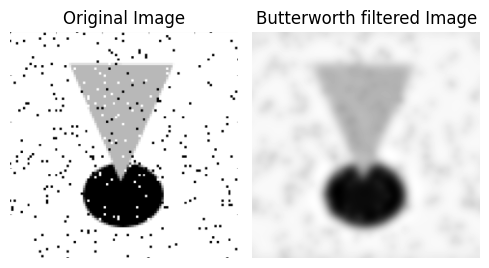

In [105]:
# Plotting the original image and the filtered image
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.abs(image), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(restored_image, cmap='gray')
plt.title('Butterworth filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()